<font size="7"><b>Connect-4 Dataset with SVM</b></font>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
index = []
board = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

for i in board:
    for j in range(6):
        index.append(i + str(j+1))

column_names = index + ['Class']

In [21]:
# Read csv from provided dataset
csv_filename = "connect-4.data"
df = pd.read_csv(csv_filename, names=column_names)

In [22]:
df.head(67557)

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,loss
67553,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,draw
67554,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,loss
67555,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,draw


In [23]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Replace x(1), o(0), and b(-1) with numerical encoding, the fitting function doesn't work with character data types
for i in range(len(x)):
    x[i] = list(map(lambda x: x.replace('b', '-1'), x[i]))
    x[i] = list(map(lambda x: x.replace('o', '0'), x[i]))
    x[i] = list(map(lambda x: x.replace('x', '1'), x[i]))




In [24]:
print(x)

[['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ...
 ['1' '1' '-1' ... '0' '-1' '-1']
 ['1' '0' '-1' ... '1' '1' '-1']
 ['1' '0' '0' ... '-1' '-1' '-1']]


In [25]:
print(y)

['win' 'win' 'win' ... 'loss' 'draw' 'draw']


Encoding the Categorical Dependent Variable

In [26]:
from sklearn.preprocessing import LabelEncoder

l_encode = LabelEncoder()
y = l_encode.fit_transform(y)
print(y)

[2 2 2 ... 1 0 0]


Splitting the Train and Test Set (20% testing, 80% training)

In [27]:
from sklearn.model_selection import train_test_split
# 20% test, 80% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=21)
print("Total # X-Training Strings: ", len(x_train))
print(x_train)
print("Total # Y-Training Strings: ", len(y_train))
print(y_train)
print("Total # X-Testing Strings: ", len(x_test))
print(x_test)
print("Total # Y-Testing Strings: ", len(y_test))
print(y_test)

Total # X-Training Strings:  40534
[['0' '1' '0' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ...
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['1' '0' '-1' ... '-1' '-1' '-1']
 ['0' '-1' '-1' ... '-1' '-1' '-1']]
Total # Y-Training Strings:  40534
[2 2 1 ... 2 0 2]
Total # X-Testing Strings:  27023
[['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['1' '1' '-1' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ...
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['-1' '-1' '-1' ... '-1' '-1' '-1']
 ['1' '0' '1' ... '-1' '-1' '-1']]
Total # Y-Testing Strings:  27023
[2 2 1 ... 2 2 1]


Defining the SVM Classifier

In [28]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#svm = SVC(kernel='poly')
svm = LinearSVC(random_state=21)

Training the SVM Classifier

In [29]:
from sklearn.model_selection import cross_val_score
clf = svm.fit(x_train, y_train)
scores = cross_val_score(clf, x, y, cv=5, n_jobs=-1)
print(scores)
# Convergence warning is expected

c:\Users\Denni\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.65830373 0.65674956 0.65524388 0.61009548 0.65035897]


Predicting the Test Result

In [30]:
y_pred = svm.predict(x_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [31]:
y_pred_vertical = y_pred.reshape(len(y_pred), 1)
print(y_pred_vertical)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


In [32]:
y_true_vertical = y_test.reshape(len(y_test), 1)
print(y_true_vertical)

[[2]
 [2]
 [1]
 ...
 [2]
 [2]
 [1]]


In [33]:
true_pred = np.concatenate((y_true_vertical, y_pred_vertical), axis=1)
print(true_pred)

[[2 2]
 [2 2]
 [1 2]
 ...
 [2 2]
 [2 2]
 [1 2]]


Plotting the Confusion Matrix

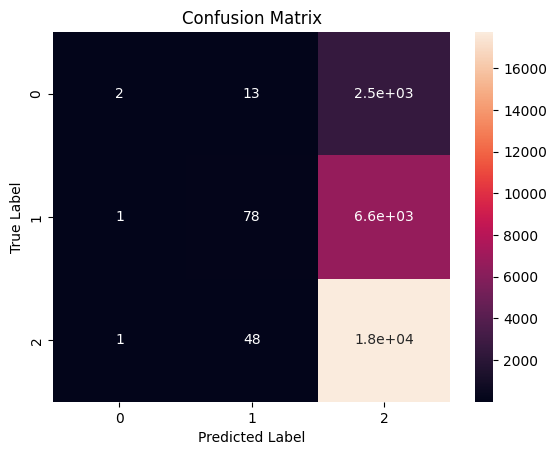

In [34]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# If all were predicted correctly, there should only be 1 kind of value per row
# Ex. Classifies all 11 setosas correctly, 2/12 versicolors are misclassified, all 7 virginicas are correctly classified

Finding the Classifier Accuracy

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6591422121896162

Refit Hyperparameters

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

# Define parameter range
param_grid = {'C': [0.1, 1, 10, 100, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
grid = HalvingGridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

# Print best parameters
print("Best parameters: ", grid.best_params_)
# Print how model looks after hyper parameter tuning
print("Best estimator: ", grid.best_estimator_)



n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 4503
max_resources_: 40534
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 4503
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=linear;, score=(train=0.659, test=0.658) total time=   0.7s
[CV 2/5] END C=0.1, gamma=1, kernel=linear;, score=(train=0.658, test=0.667) total time=   0.7s
[CV 3/5] END C=0.1, gamma=1, kernel=linear;, score=(train=0.668, test=0.657) total time=   0.7s
[CV 4/5] END C=0.1, gamma=1, kernel=linear;, score=(train=0.659, test=0.664) total time=   0.7s
[CV 5/5] END C=0.1, gamma=1, kernel=linear;, score=(train=0.664, test=0.660) total time=   0.8s
[CV 1/5] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.659, test=0.658) total time=   0.7s
[CV 2/5] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.658, test=0.667) total time=   0.8s
[CV 3/5] END C=0.1, gamma=0.1, kernel=linear;, score=(train